In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib as mpl
import folium
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [626]:
df = pd.read_excel("data/gun_violence_data.xlsx")

In [627]:
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,latitude,longitude
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,40.3467,-79.8559
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,33.9090,-118.3330
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,41.4455,-82.1377
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,39.6518,-104.8020
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,36.1140,-79.9569


In [628]:
df_drop = df.drop(columns=["date", "address", "latitude", "longitude", "city_or_county", "incident_id"])

In [629]:
df_drop["injured_or_killed"] = df_drop["n_injured"] + df_drop["n_killed"]

In [630]:
df_drop.groupby("state").sum()

,n_killed,n_injured,injured_or_killed
state,,,
Alabama,1880,2998,4878
Alaska,267,325,592
Arizona,1094,1096,2190
Arkansas,773,1347,2120
California,5562,7644,13206
Colorado,796,1133,1929
Connecticut,341,1258,1599
Delaware,217,853,1070
District of Columbia,459,1415,1874


In [631]:
grouped_df = df_drop.groupby("state").sum().reset_index()

In [632]:
# Normalize the values for color mapping
norm = plt.Normalize(grouped_df['injured_or_killed'].min(), grouped_df['injured_or_killed'].max())
cmap = plt.get_cmap('RdYlGn_r')  # Red to Green colormap

# Create a color array based on the 'injured_or_killed' values
colors = cmap(norm(grouped_df['injured_or_killed']))

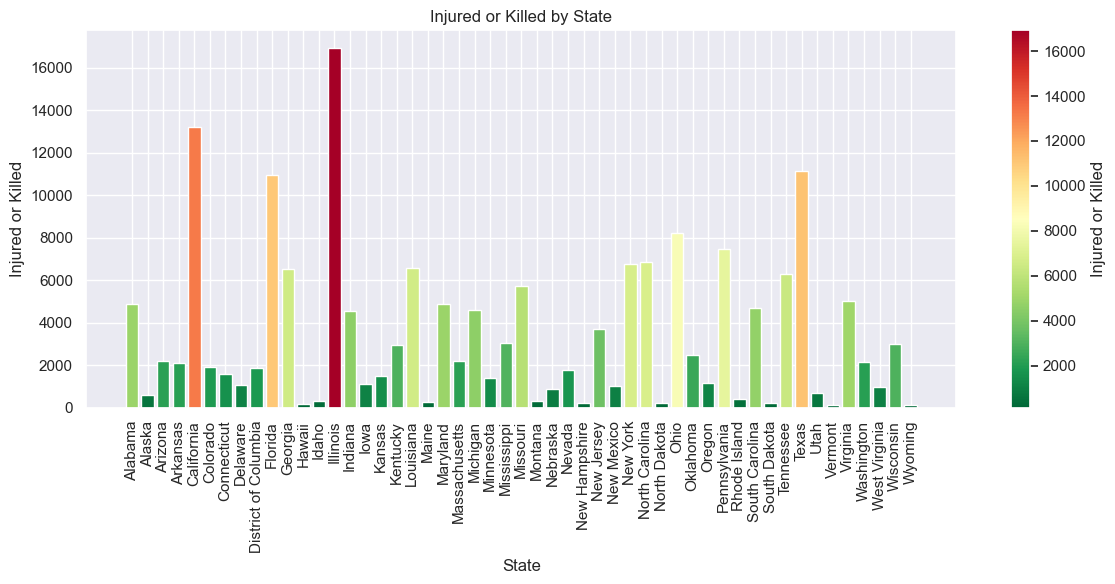

In [633]:
# Plotting
plt.figure(figsize=(12, 6))  # Set figure size
bars = plt.bar(grouped_df['state'], grouped_df['injured_or_killed'], color=colors)

plt.xlabel('State')
plt.ylabel('Injured or Killed')
plt.title('Injured or Killed by State')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit all elements

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for older versions of matplotlib
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical')
cbar.set_label('Injured or Killed')

plt.show()

In [634]:
# Normalize the values for color mapping
norm = plt.Normalize(grouped_df['n_killed'].min(), grouped_df['n_killed'].max())
cmap = plt.get_cmap('RdYlGn_r')  # Red to Green colormap

# Create a color array based on the 'injured_or_killed' values
colors = cmap(norm(grouped_df['n_killed']))

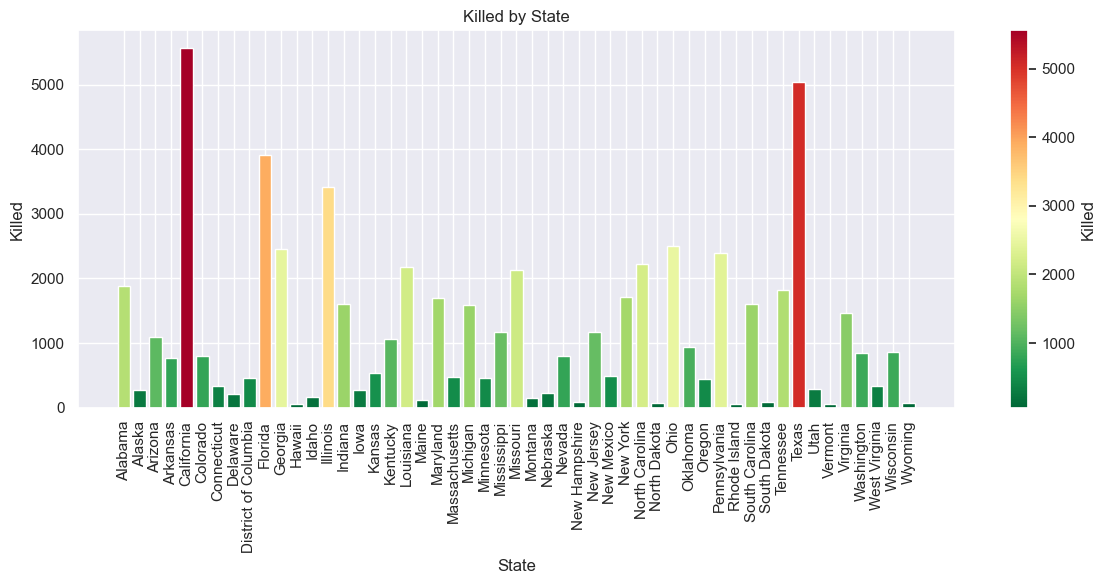

In [635]:
# Plotting
plt.figure(figsize=(12, 6))  # Set figure size
bars = plt.bar(grouped_df['state'], grouped_df['n_killed'], color=colors)

plt.xlabel('State')
plt.ylabel('Killed')
plt.title('Killed by State')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit all elements

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for older versions of matplotlib
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical')
cbar.set_label('Killed')

plt.show()

In [636]:
# Normalize the values for color mapping
norm = plt.Normalize(grouped_df['n_injured'].min(), grouped_df['n_injured'].max())
cmap = plt.get_cmap('RdYlGn_r')  # Red to Green colormap

# Create a color array based on the 'injured_or_killed' values
colors = cmap(norm(grouped_df['n_injured']))

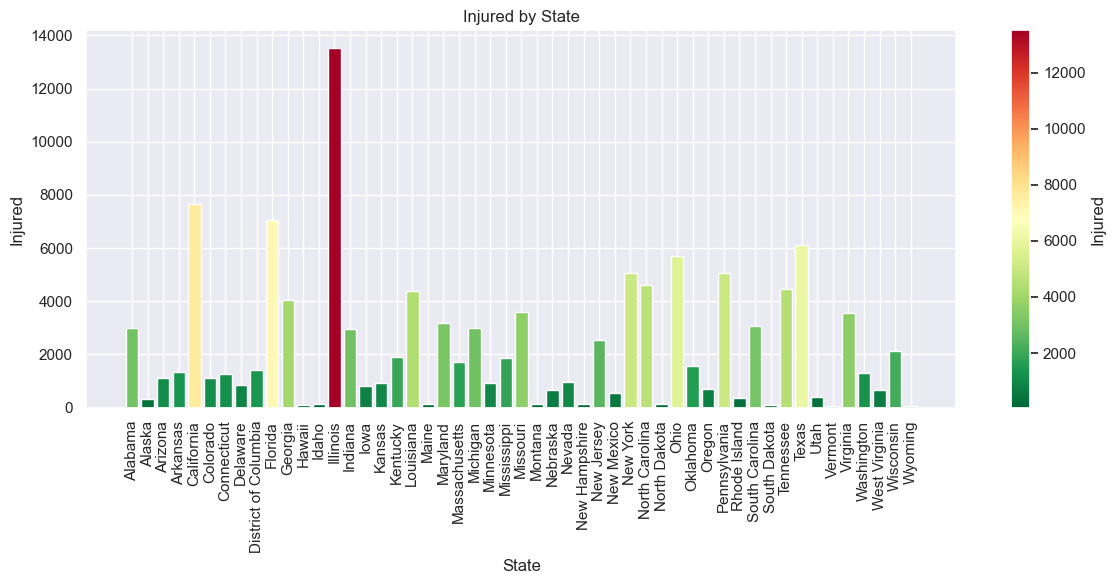

In [637]:
# Plotting
plt.figure(figsize=(12, 6))  # Set figure size
bars = plt.bar(grouped_df['state'], grouped_df['n_injured'], color=colors)

plt.xlabel('State')
plt.ylabel('Injured')
plt.title('Injured by State')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit all elements

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for older versions of matplotlib
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical')
cbar.set_label('Injured')

plt.show()

In [638]:
us_pop = pd.read_excel("data/us_population.xlsx")

In [639]:
us_pop.head()

,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Table 1. Annual Estimates of the Resident Popu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Geographic Area,2010-04-01 00:00:00,NaN,Population Estimate (as of July 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Census,Estimates Base,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
3,United States,308745538,308758105,309321666,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
4,Northeast,55317240,55318443,55380134,55604223.0,55775216.0,55901806.0,56006011.0,56034684.0,56042330.0,56059240.0,56046620.0,55982803.0


In [640]:
us_pop_drop = us_pop.drop(columns=["Unnamed: 1", "Unnamed: 2", "Unnamed: 3", "Unnamed: 4", "Unnamed: 5", "Unnamed: 12"])

In [641]:
us_pop_drop.head()

,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Table 1. Annual Estimates of the Resident Popu...,NaN,NaN,NaN,NaN,NaN,NaN
1,Geographic Area,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
3,United States,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0
4,Northeast,55901806.0,56006011.0,56034684.0,56042330.0,56059240.0,56046620.0


In [642]:
n = 8
us_pop_drop = us_pop_drop[n:]
us_pop_drop.head()

,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
8,.Alabama,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0
9,.Alaska,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0
10,.Arizona,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0
11,.Arkansas,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0
12,.California,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0


In [643]:
# Calculate the average
us_pop_drop["average"] = us_pop_drop[["Unnamed: 6", "Unnamed: 7", "Unnamed: 8", "Unnamed: 9", "Unnamed: 10", "Unnamed: 11"]].mean(axis=1)

# Drop rows with NaN in the average column
us_pop_drop = us_pop_drop.dropna(subset=["average"])

# Convert the average to integer
us_pop_drop["average"] = us_pop_drop["average"].astype(int)

# Drop the original columns
us_pop_drop = us_pop_drop.drop(columns=["Unnamed: 6", "Unnamed: 7", "Unnamed: 8", "Unnamed: 9", "Unnamed: 10", "Unnamed: 11"])


In [644]:
# Rename specific columns
us_pop_drop.rename(columns={'table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts)': 'State', 
                   'average': 'Population'}, inplace=True)


In [645]:
us_pop_drop.head()

,State,Population
8,.Alabama,4858319
9,.Alaska,737857
10,.Arizona,6889326
11,.Arkansas,2984306
12,.California,38960501


In [646]:
# Remove leading dots from the 'state' column
us_pop_drop['State'] = us_pop_drop['State'].str.lstrip('.')

In [647]:
us_pop_drop.head()

,State,Population
8,Alabama,4858319
9,Alaska,737857
10,Arizona,6889326
11,Arkansas,2984306
12,California,38960501


In [648]:
# Merge the gun violence data with the population data
# Rename the 'state' column in grouped_df before merging
grouped_df.rename(columns={'state': 'State'}, inplace=True)

# Now merge
merged_df = pd.merge(
    grouped_df,   # Will now have 'State' instead of 'state'
    us_pop_drop,  # Contains 'State'
    on='State',   # Merge on the renamed column
    how='inner'
)

# Display the merged DataFrame
merged_df.head()


,State,n_killed,n_injured,injured_or_killed,Population
0,Alabama,1880,2998,4878,4858319
1,Alaska,267,325,592,737857
2,Arizona,1094,1096,2190,6889326
3,Arkansas,773,1347,2120,2984306
4,California,5562,7644,13206,38960501


In [649]:
merged_df["injured_or_killed_per_10000_per_5_years"] = merged_df["injured_or_killed"] / merged_df["Population"] * 10000
merged_df["injured_per_10000"] = merged_df["n_injured"] / merged_df["Population"] * 10000
merged_df["killed_per_10000"] = merged_df["n_killed"] / merged_df["Population"] * 10000

In [650]:
merged_df.head(55)

,State,n_killed,n_injured,injured_or_killed,Population,injured_or_killed_per_10000_per_5_years,injured_per_10000,killed_per_10000
0,Alabama,1880,2998,4878,4858319,10.040510,6.170859,3.869651
1,Alaska,267,325,592,737857,8.023235,4.404648,3.618587
2,Arizona,1094,1096,2190,6889326,3.178831,1.590867,1.587964
3,Arkansas,773,1347,2120,2984306,7.103829,4.513612,2.590217
4,California,5562,7644,13206,38960501,3.389587,1.961987,1.427600
5,Colorado,796,1133,1929,5485357,3.516635,2.065499,1.451136
6,Connecticut,341,1258,1599,3583240,4.462442,3.510789,0.951653
7,Delaware,217,853,1070,944756,11.325676,9.028786,2.296889
8,District of Columbia,459,1415,1874,678429,27.622640,20.857009,6.765631
9,Florida,3909,7072,10981,20403663,5.381877,3.466044,1.915832


In [651]:
merged_df.to_excel("data/merged_data.xlsx", index=False)

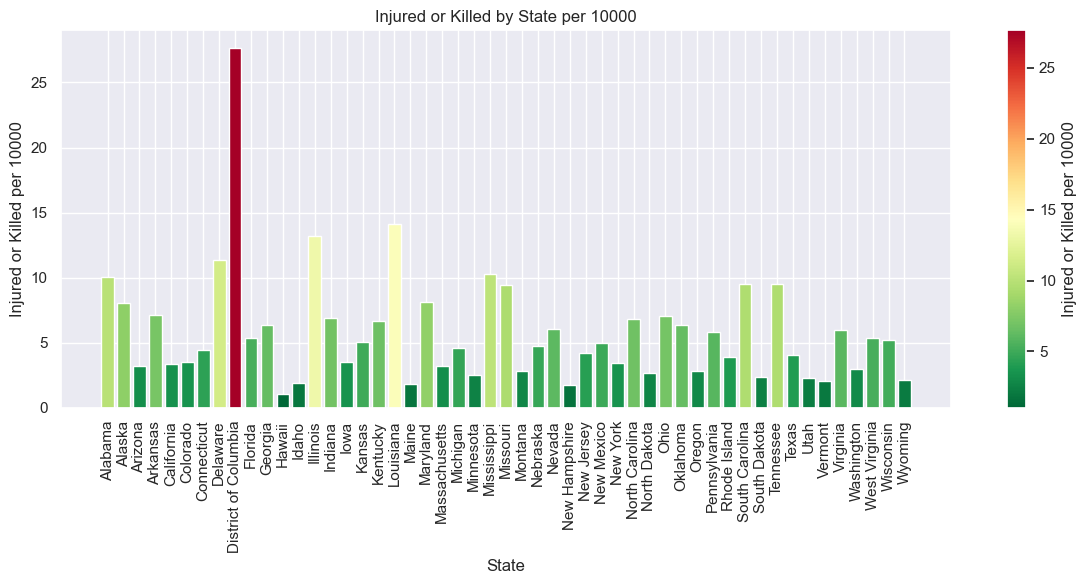

In [652]:
norm = plt.Normalize(merged_df['injured_or_killed_per_10000_per_5_years'].min(), merged_df['injured_or_killed_per_10000_per_5_years'].max())
cmap = plt.get_cmap('RdYlGn_r')  # Red to Green colormap

# Create a color array based on the 'injured_or_killed' values
colors = cmap(norm(merged_df['injured_or_killed_per_10000_per_5_years']))
# Plotting
plt.figure(figsize=(12, 6))  # Set figure size
bars = plt.bar(merged_df['State'], merged_df['injured_or_killed_per_10000_per_5_years'], color=colors)

plt.xlabel('State')
plt.ylabel('Injured or Killed per 10000')
plt.title('Injured or Killed by State per 10000')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit all elements

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for older versions of matplotlib
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical')
cbar.set_label('Injured or Killed per 10000')

plt.show()

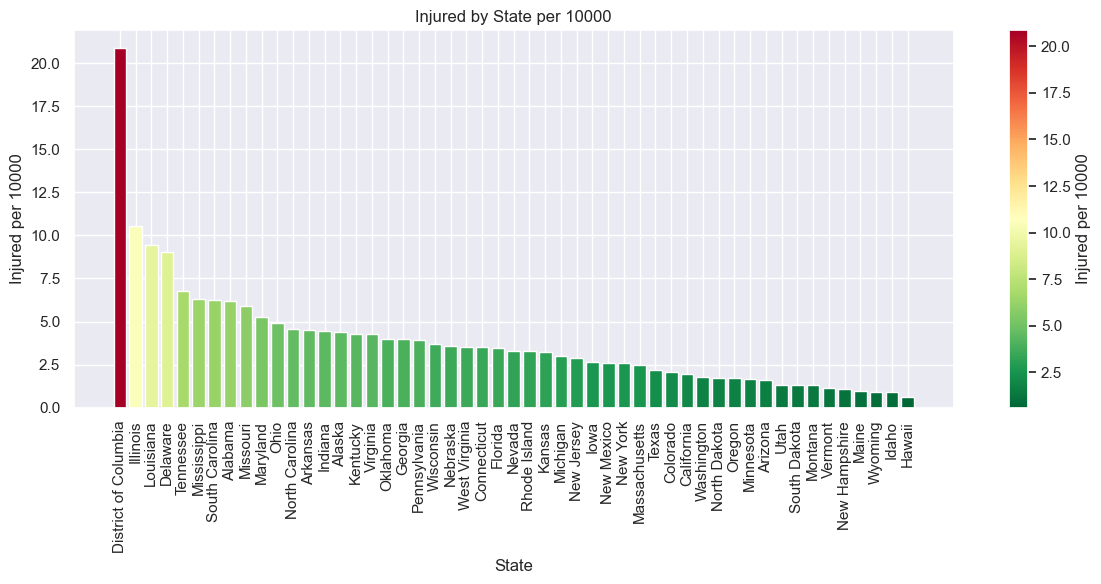

In [653]:
# Sort the DataFrame by 'injured_per_10000' in descending order
merged_df_sorted = merged_df.sort_values(by='injured_per_10000', ascending=False)

# Normalize the 'injured_per_10000' values for the colormap
norm = plt.Normalize(merged_df_sorted['injured_per_10000'].min(), merged_df_sorted['injured_per_10000'].max())
cmap = plt.get_cmap('RdYlGn_r')  # Red to Green colormap

# Create a color array based on the sorted 'injured_per_10000' values
colors = cmap(norm(merged_df_sorted['injured_per_10000']))

# Plotting the sorted data
plt.figure(figsize=(12, 6))  # Set figure size
bars = plt.bar(merged_df_sorted['State'], merged_df_sorted['injured_per_10000'], color=colors)

plt.xlabel('State')
plt.ylabel('Injured per 10000')
plt.title('Injured by State per 10000')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit all elements

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for older versions of matplotlib
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical')
cbar.set_label('Injured per 10000')

plt.show()


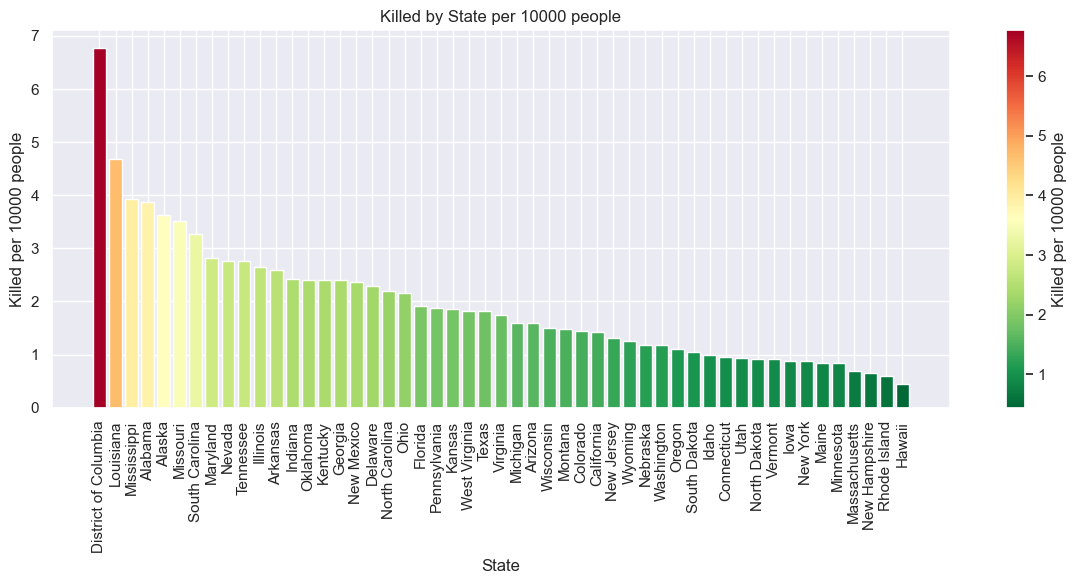

In [654]:
# Sort the DataFrame by 'killed_per_10000' in descending order
merged_df_sorted = merged_df.sort_values(by='killed_per_10000', ascending=False)

# Normalize the 'killed_per_10000' values for the colormap
norm = plt.Normalize(merged_df_sorted['killed_per_10000'].min(), merged_df_sorted['killed_per_10000'].max())
cmap = plt.get_cmap('RdYlGn_r')  # Red to Green colormap

# Create a color array based on the sorted 'killed_per_10000' values
colors = cmap(norm(merged_df_sorted['killed_per_10000']))

# Plotting the sorted data
plt.figure(figsize=(12, 6))  # Set figure size
bars = plt.bar(merged_df_sorted['State'], merged_df_sorted['killed_per_10000'], color=colors)

plt.xlabel('State')
plt.ylabel('Killed per 10000 people')
plt.title('Killed by State per 10000 people')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit all elements

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for older versions of matplotlib
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical')
cbar.set_label('Killed per 10000 people')

plt.show()


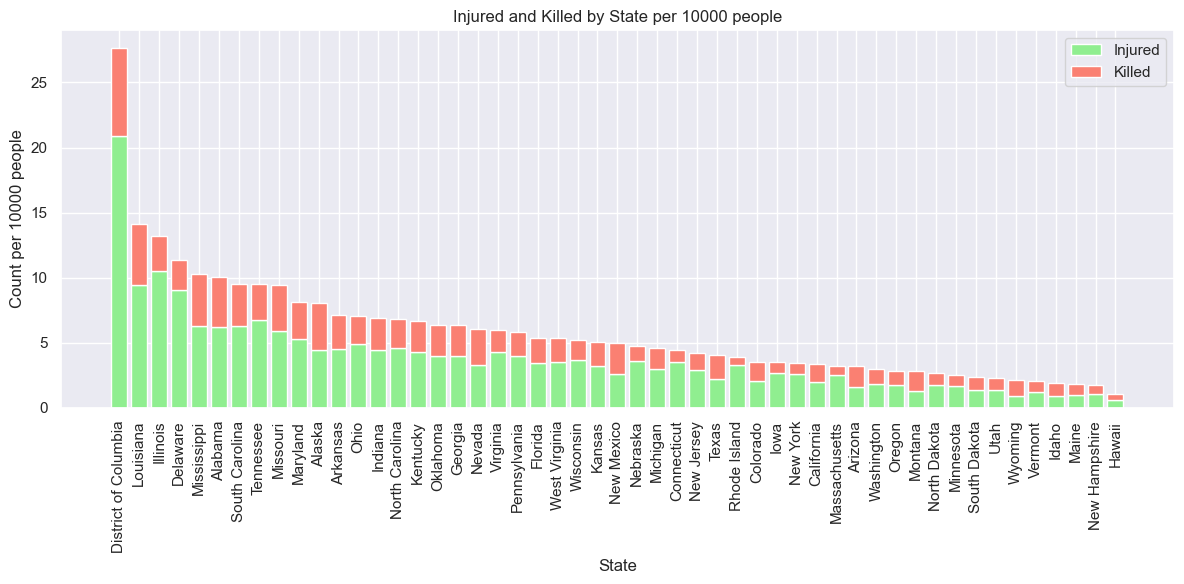

In [655]:
# Create a new column that sums 'killed_per_10000' and 'injured_per_10000'
merged_df['total_per_10000'] = merged_df['injured_per_10000'] + merged_df['killed_per_10000']

# Sort the DataFrame by 'total_per_10000' in descending order
merged_df_sorted = merged_df.sort_values(by='total_per_10000', ascending=False)

# Plotting the stacked bar chart without colormap
plt.figure(figsize=(12, 6))
plt.bar(merged_df_sorted['State'], merged_df_sorted['injured_per_10000'], label='Injured', color='lightgreen')
plt.bar(merged_df_sorted['State'], merged_df_sorted['killed_per_10000'], bottom=merged_df_sorted['injured_per_10000'], label='Killed', color='salmon')

plt.xlabel('State')
plt.ylabel('Count per 10000 people')
plt.title('Injured and Killed by State per 10000 people')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


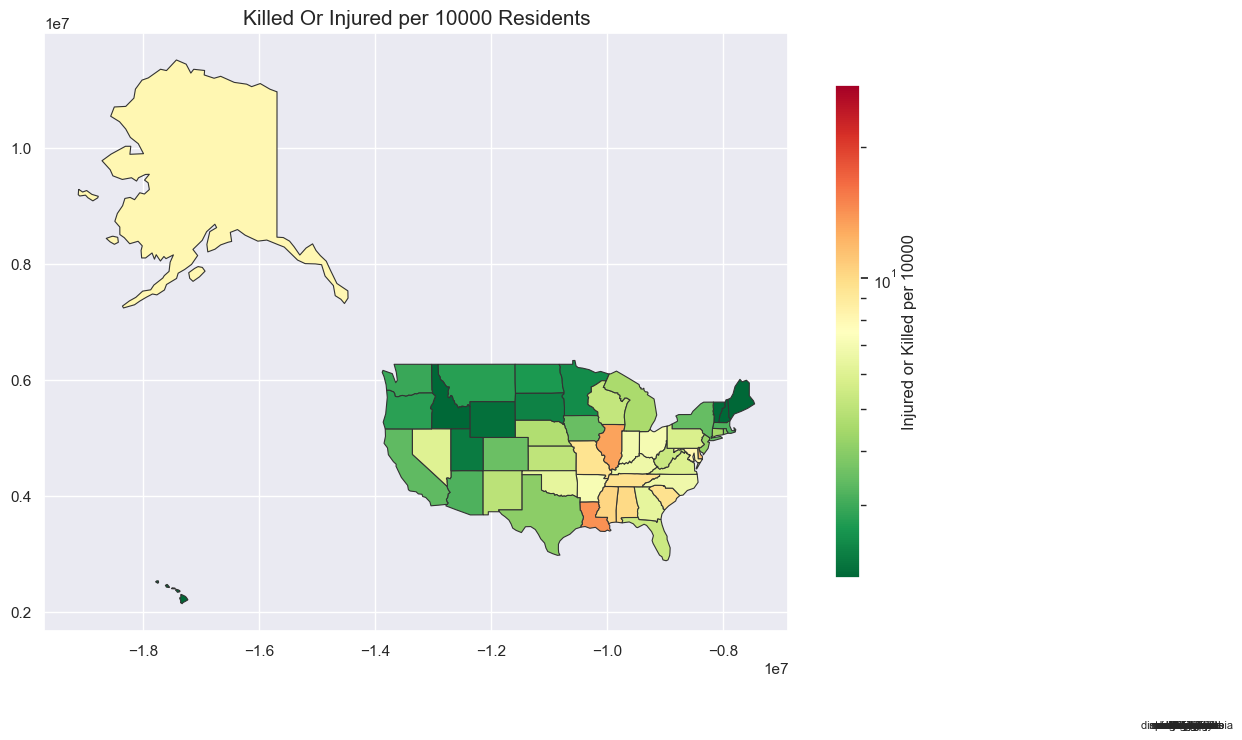

In [656]:
# Load the shapefile for US states
shapefile_path = "data/ne_110m_admin_1_states_provinces"  # Replace with actual path
us_states = gpd.read_file(shapefile_path)

# Filter for only US states (sometimes territories may be included)
us_states = us_states[us_states['admin'] == 'United States of America']

# Ensure state names are properly formatted in both datasets
us_states['name'] = us_states['name'].str.lower()
merged_df['State'] = merged_df['State'].str.lower()

# Merge the geographical data with your dataset
geo_merged = us_states.set_index('name').join(merged_df.set_index('State'))

# Re-project to a projected CRS (for example, EPSG:3857)
geo_merged = geo_merged.to_crs(epsg=3857)

# Use a diverging colormap for better contrast
cmap = plt.get_cmap('RdYlGn_r')  

# Use LogNorm for normalization
norm = mpl.colors.LogNorm(vmin=geo_merged['injured_or_killed_per_10000_per_5_years'].min() + 1, 
                           vmax=geo_merged['injured_or_killed_per_10000_per_5_years'].max())

# Plotting the choropleth map with the updated settings
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
geo_merged.plot(column='injured_or_killed_per_10000_per_5_years', cmap=cmap, 
                linewidth=0.8, ax=ax, edgecolor='0.2', norm=norm)

# Add a colorbar with updated properties
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, shrink=0.8)
cbar.set_label('Injured or Killed per 10000')

# Calculate centroids for adding state names
centroids = geo_merged.geometry.centroid.to_crs(epsg=4326)  # Convert back to geographic CRS for labeling

# Add state names
for x, y, label in zip(centroids.x, centroids.y, geo_merged.index):
    ax.text(x, y, label, fontsize=8, ha='center')

# Add title and show the plot
plt.title('Killed Or Injured per 10000 Residents', fontsize=15)
plt.show()

In [657]:
state_size = pd.read_excel("data/states_size.xlsx")

In [658]:
state_size = state_size.drop("Sq. Mi.", axis=1)

In [659]:
state_size.rename(columns={'State/Territory': 'State'}, inplace=True)

In [660]:
state_size['State'] = state_size['State'].str.lower()
final_merged_df = pd.merge(
    merged_df,      # DataFrame with gun violence data
    state_size,     # DataFrame with state sizes
    on='State',     # Column to merge on
    how='inner'     # Use 'inner' merge to only keep states present in both DataFrames
)

In [661]:
final_merged_df.head(55)

,State,n_killed,n_injured,injured_or_killed,Population,injured_or_killed_per_10000_per_5_years,injured_per_10000,killed_per_10000,total_per_10000,Sq. Km.
0,alabama,1880,2998,4878,4858319,10.040510,6.170859,3.869651,10.040510,131171
1,alaska,267,325,592,737857,8.023235,4.404648,3.618587,8.023235,1477953
2,arizona,1094,1096,2190,6889326,3.178831,1.590867,1.587964,3.178831,294207
3,arkansas,773,1347,2120,2984306,7.103829,4.513612,2.590217,7.103829,134771
4,california,5562,7644,13206,38960501,3.389587,1.961987,1.427600,3.389587,403466
5,colorado,796,1133,1929,5485357,3.516635,2.065499,1.451136,3.516635,268431
6,connecticut,341,1258,1599,3583240,4.462442,3.510789,0.951653,4.462442,12542
7,delaware,217,853,1070,944756,11.325676,9.028786,2.296889,11.325676,5047
8,district of columbia,459,1415,1874,678429,27.622640,20.857009,6.765631,27.622640,158
9,florida,3909,7072,10981,20403663,5.381877,3.466044,1.915832,5.381877,138887


In [662]:
final_merged_df['injured_or_killed_per_100_kilometer'] = final_merged_df['injured_or_killed'] / final_merged_df['Sq. Km.'] * 100

In [663]:
final_merged_df['injured_per_100_kilometer'] = final_merged_df['n_injured'] / final_merged_df['Sq. Km.'] * 100

In [664]:
final_merged_df['killed_per_100_kilometer'] = final_merged_df['n_killed'] / final_merged_df['Sq. Km.'] * 100

In [665]:
final_merged_df.head(55)

,State,n_killed,n_injured,injured_or_killed,Population,injured_or_killed_per_10000_per_5_years,injured_per_10000,killed_per_10000,total_per_10000,Sq. Km.,injured_or_killed_per_100_kilometer,injured_per_100_kilometer,killed_per_100_kilometer
0,alabama,1880,2998,4878,4858319,10.040510,6.170859,3.869651,10.040510,131171,3.718810,2.285566,1.433244
1,alaska,267,325,592,737857,8.023235,4.404648,3.618587,8.023235,1477953,0.040055,0.021990,0.018066
2,arizona,1094,1096,2190,6889326,3.178831,1.590867,1.587964,3.178831,294207,0.744374,0.372527,0.371847
3,arkansas,773,1347,2120,2984306,7.103829,4.513612,2.590217,7.103829,134771,1.573039,0.999473,0.573566
4,california,5562,7644,13206,38960501,3.389587,1.961987,1.427600,3.389587,403466,3.273138,1.894583,1.378555
5,colorado,796,1133,1929,5485357,3.516635,2.065499,1.451136,3.516635,268431,0.718620,0.422082,0.296538
6,connecticut,341,1258,1599,3583240,4.462442,3.510789,0.951653,4.462442,12542,12.749163,10.030298,2.718865
7,delaware,217,853,1070,944756,11.325676,9.028786,2.296889,11.325676,5047,21.200713,16.901129,4.299584
8,district of columbia,459,1415,1874,678429,27.622640,20.857009,6.765631,27.622640,158,1186.075949,895.569620,290.506329
9,florida,3909,7072,10981,20403663,5.381877,3.466044,1.915832,5.381877,138887,7.906428,5.091909,2.814518


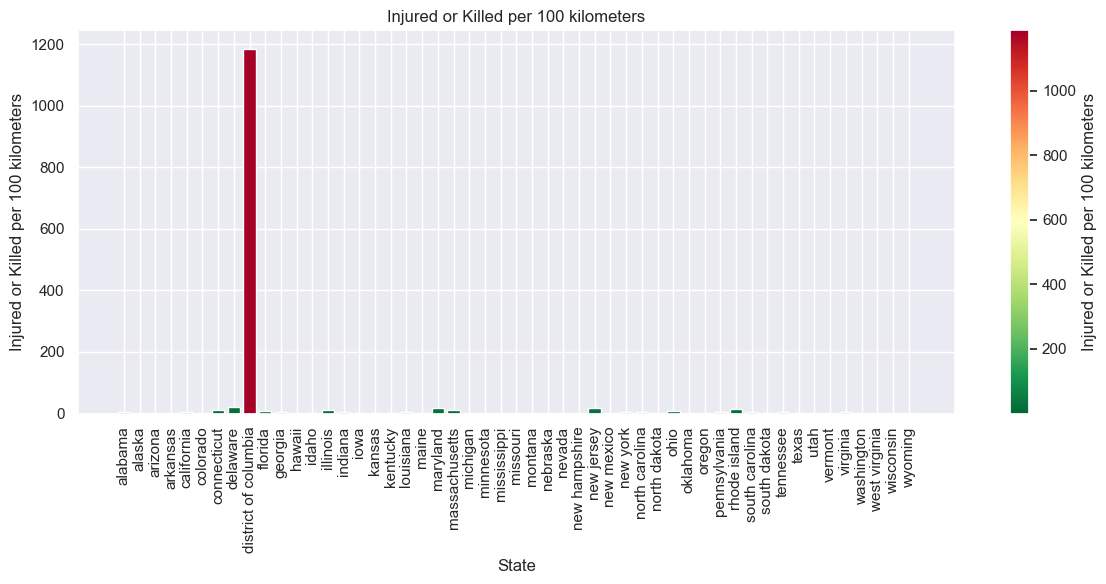

In [666]:
norm = plt.Normalize(final_merged_df['injured_or_killed_per_100_kilometer'].min(), final_merged_df['injured_or_killed_per_100_kilometer'].max())
cmap = plt.get_cmap('RdYlGn_r')  # Red to Green colormap

# Create a color array based on the 'injured_or_killed' values
colors = cmap(norm(final_merged_df['injured_or_killed_per_100_kilometer']))
# Plotting
plt.figure(figsize=(12, 6))  # Set figure size
bars = plt.bar(final_merged_df['State'], final_merged_df['injured_or_killed_per_100_kilometer'], color=colors)

plt.xlabel('State')
plt.ylabel('Injured or Killed per 100 kilometers')
plt.title('Injured or Killed per 100 kilometers')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit all elements

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for older versions of matplotlib
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical')
cbar.set_label('Injured or Killed per 100 kilometers')

plt.show()

In [667]:
# Identify the index of the row where the State is "District of Columbia"
index_to_drop = final_merged_df[final_merged_df['State'] == 'district of columbia'].index

# Drop the row(s) by index
final_merged_df = final_merged_df.drop(index_to_drop)


In [668]:
final_merged_df.head(55)

,State,n_killed,n_injured,injured_or_killed,Population,injured_or_killed_per_10000_per_5_years,injured_per_10000,killed_per_10000,total_per_10000,Sq. Km.,injured_or_killed_per_100_kilometer,injured_per_100_kilometer,killed_per_100_kilometer
0,alabama,1880,2998,4878,4858319,10.040510,6.170859,3.869651,10.040510,131171,3.718810,2.285566,1.433244
1,alaska,267,325,592,737857,8.023235,4.404648,3.618587,8.023235,1477953,0.040055,0.021990,0.018066
2,arizona,1094,1096,2190,6889326,3.178831,1.590867,1.587964,3.178831,294207,0.744374,0.372527,0.371847
3,arkansas,773,1347,2120,2984306,7.103829,4.513612,2.590217,7.103829,134771,1.573039,0.999473,0.573566
4,california,5562,7644,13206,38960501,3.389587,1.961987,1.427600,3.389587,403466,3.273138,1.894583,1.378555
5,colorado,796,1133,1929,5485357,3.516635,2.065499,1.451136,3.516635,268431,0.718620,0.422082,0.296538
6,connecticut,341,1258,1599,3583240,4.462442,3.510789,0.951653,4.462442,12542,12.749163,10.030298,2.718865
7,delaware,217,853,1070,944756,11.325676,9.028786,2.296889,11.325676,5047,21.200713,16.901129,4.299584
9,florida,3909,7072,10981,20403663,5.381877,3.466044,1.915832,5.381877,138887,7.906428,5.091909,2.814518
10,georgia,2456,4056,6512,10240259,6.359214,3.960837,2.398377,6.359214,148959,4.371673,2.722897,1.648776


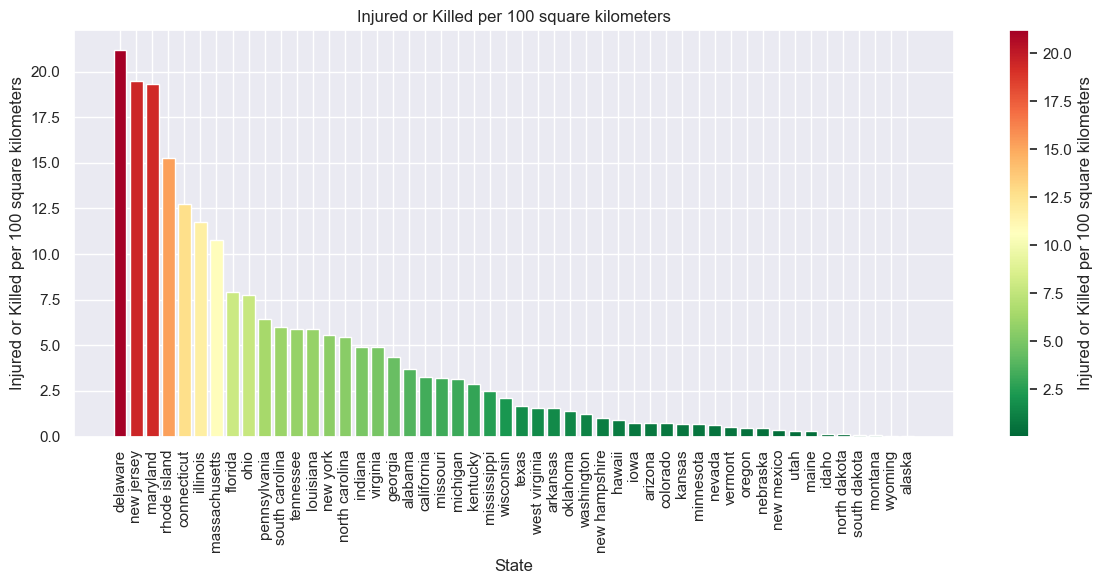

In [669]:
# Sort the DataFrame in descending order based on 'injured_or_killed_per_100_kilometer'
final_merged_df_sorted = final_merged_df.sort_values('injured_or_killed_per_100_kilometer', ascending=False)

# Normalize the color map based on the sorted data
norm = plt.Normalize(final_merged_df_sorted['injured_or_killed_per_100_kilometer'].min(), final_merged_df_sorted['injured_or_killed_per_100_kilometer'].max())
cmap = plt.get_cmap('RdYlGn_r')  # Red to Green colormap

# Create a color array based on the sorted 'injured_or_killed_per_100_kilometer' values
colors = cmap(norm(final_merged_df_sorted['injured_or_killed_per_100_kilometer']))

# Plotting
plt.figure(figsize=(12, 6))  # Set figure size
bars = plt.bar(final_merged_df_sorted['State'], final_merged_df_sorted['injured_or_killed_per_100_kilometer'], color=colors)

plt.xlabel('State')
plt.ylabel('Injured or Killed per 100 square kilometers')
plt.title('Injured or Killed per 100 square kilometers')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit all elements

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for older versions of matplotlib
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical')
cbar.set_label('Injured or Killed per 100 square kilometers')

plt.show()

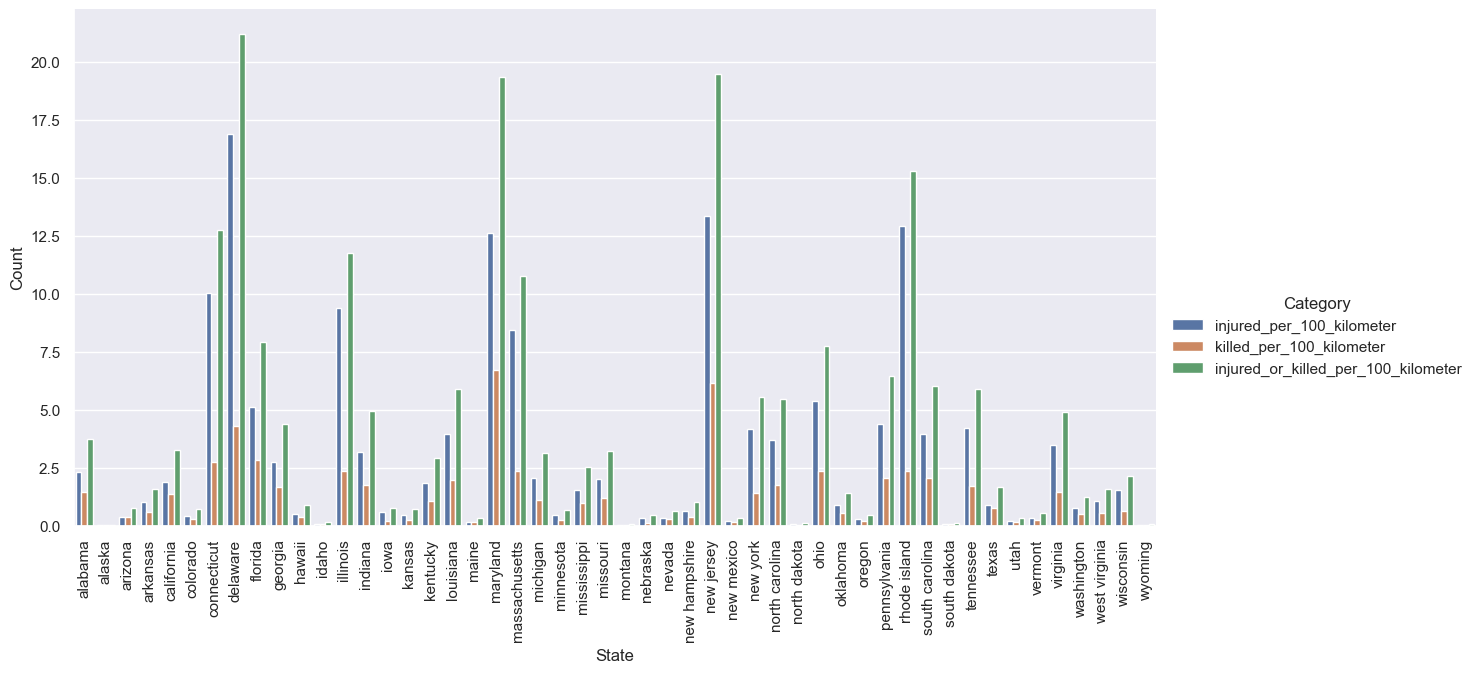

In [670]:
melted_df = final_merged_df.melt(id_vars=['State'], 
                                   value_vars=['injured_per_100_kilometer', 'killed_per_100_kilometer', 'injured_or_killed_per_100_kilometer'],
                                   var_name='Category', 
                                   value_name='Count')

# Create a faceted bar plot
g = sns.catplot(data=melted_df, x='State', y='Count', hue='Category', kind='bar', height=6, aspect=2)
g.set_xticklabels(rotation=90)
g.set_titles('Gun Violence Metrics per 100 Kilometers')
g.set_axis_labels('State', 'Count')
plt.show()

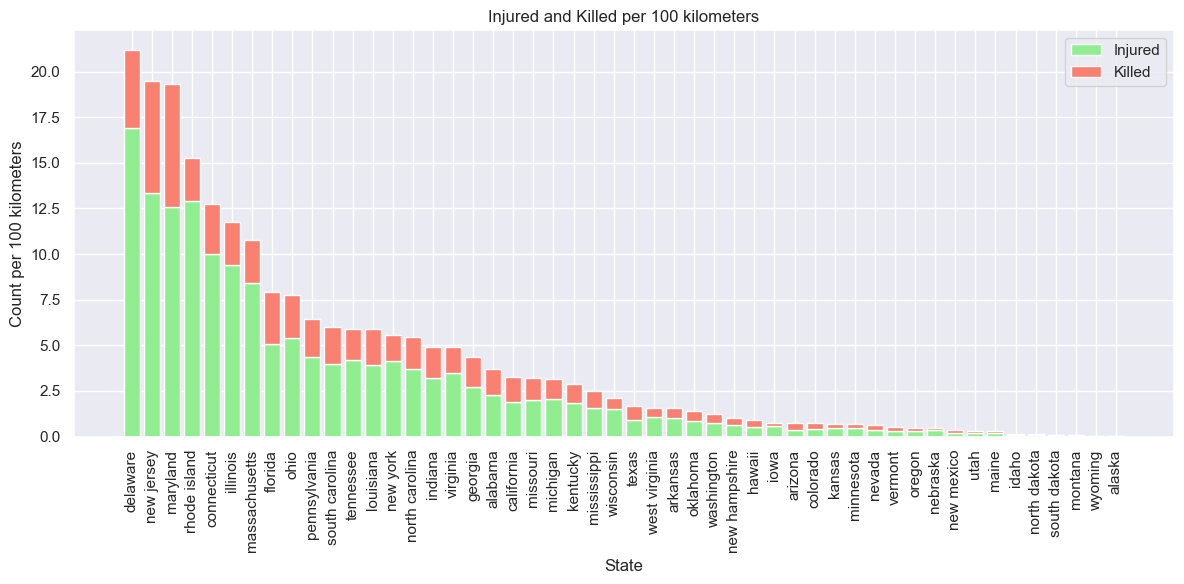

In [671]:
# Create a new column that sums the injured and killed counts
final_merged_df['total_per_100_kilometer'] = final_merged_df['injured_per_100_kilometer'] + final_merged_df['killed_per_100_kilometer']

# Sort the DataFrame by this new column in descending order
final_merged_df_sorted = final_merged_df.sort_values(by='total_per_100_kilometer', ascending=False)

# Now re-plot the stacked bar plot with the sorted data
plt.figure(figsize=(12, 6))
plt.bar(final_merged_df_sorted['State'], final_merged_df_sorted['injured_per_100_kilometer'], label='Injured', color='lightgreen')
plt.bar(final_merged_df_sorted['State'], final_merged_df_sorted['killed_per_100_kilometer'], bottom=final_merged_df_sorted['injured_per_100_kilometer'], label='Killed', color='salmon')
plt.xlabel('State')
plt.ylabel('Count per 100 kilometers')
plt.title('Injured and Killed per 100 kilometers')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


In [672]:
# Create a base map
m = folium.Map(location=[37.1, -95.7], zoom_start=4)

# Add a choropleth layer
folium.Choropleth(
    geo_data=us_states,
    name='choropleth',
    data=final_merged_df,
    columns=['State', 'killed_per_100_kilometer'],
    key_on='feature.properties.name',
    fill_color='RdYlGn_r',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Killed per 100 square kilometers',
).add_to(m)

# Show the map
m.save('gun_violence_map.html')

In [673]:
final_merged_df.head(55)

,State,n_killed,n_injured,injured_or_killed,Population,injured_or_killed_per_10000_per_5_years,injured_per_10000,killed_per_10000,total_per_10000,Sq. Km.,injured_or_killed_per_100_kilometer,injured_per_100_kilometer,killed_per_100_kilometer,total_per_100_kilometer
0,alabama,1880,2998,4878,4858319,10.040510,6.170859,3.869651,10.040510,131171,3.718810,2.285566,1.433244,3.718810
1,alaska,267,325,592,737857,8.023235,4.404648,3.618587,8.023235,1477953,0.040055,0.021990,0.018066,0.040055
2,arizona,1094,1096,2190,6889326,3.178831,1.590867,1.587964,3.178831,294207,0.744374,0.372527,0.371847,0.744374
3,arkansas,773,1347,2120,2984306,7.103829,4.513612,2.590217,7.103829,134771,1.573039,0.999473,0.573566,1.573039
4,california,5562,7644,13206,38960501,3.389587,1.961987,1.427600,3.389587,403466,3.273138,1.894583,1.378555,3.273138
5,colorado,796,1133,1929,5485357,3.516635,2.065499,1.451136,3.516635,268431,0.718620,0.422082,0.296538,0.718620
6,connecticut,341,1258,1599,3583240,4.462442,3.510789,0.951653,4.462442,12542,12.749163,10.030298,2.718865,12.749163
7,delaware,217,853,1070,944756,11.325676,9.028786,2.296889,11.325676,5047,21.200713,16.901129,4.299584,21.200713
9,florida,3909,7072,10981,20403663,5.381877,3.466044,1.915832,5.381877,138887,7.906428,5.091909,2.814518,7.906428
10,georgia,2456,4056,6512,10240259,6.359214,3.960837,2.398377,6.359214,148959,4.371673,2.722897,1.648776,4.371673


In [674]:
final_merged_df.drop('total_per_10000', axis=1, inplace=True)
final_merged_df.drop('total_per_100_kilometer', axis=1, inplace=True)

In [675]:
final_merged_df.head(55)

,State,n_killed,n_injured,injured_or_killed,Population,injured_or_killed_per_10000_per_5_years,injured_per_10000,killed_per_10000,Sq. Km.,injured_or_killed_per_100_kilometer,injured_per_100_kilometer,killed_per_100_kilometer
0,alabama,1880,2998,4878,4858319,10.040510,6.170859,3.869651,131171,3.718810,2.285566,1.433244
1,alaska,267,325,592,737857,8.023235,4.404648,3.618587,1477953,0.040055,0.021990,0.018066
2,arizona,1094,1096,2190,6889326,3.178831,1.590867,1.587964,294207,0.744374,0.372527,0.371847
3,arkansas,773,1347,2120,2984306,7.103829,4.513612,2.590217,134771,1.573039,0.999473,0.573566
4,california,5562,7644,13206,38960501,3.389587,1.961987,1.427600,403466,3.273138,1.894583,1.378555
5,colorado,796,1133,1929,5485357,3.516635,2.065499,1.451136,268431,0.718620,0.422082,0.296538
6,connecticut,341,1258,1599,3583240,4.462442,3.510789,0.951653,12542,12.749163,10.030298,2.718865
7,delaware,217,853,1070,944756,11.325676,9.028786,2.296889,5047,21.200713,16.901129,4.299584
9,florida,3909,7072,10981,20403663,5.381877,3.466044,1.915832,138887,7.906428,5.091909,2.814518
10,georgia,2456,4056,6512,10240259,6.359214,3.960837,2.398377,148959,4.371673,2.722897,1.648776


In [676]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 50
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   State                                    50 non-null     object 
 1   n_killed                                 50 non-null     int64  
 2   n_injured                                50 non-null     int64  
 3   injured_or_killed                        50 non-null     int64  
 4   Population                               50 non-null     int64  
 5   injured_or_killed_per_10000_per_5_years  50 non-null     float64
 6   injured_per_10000                        50 non-null     float64
 7   killed_per_10000                         50 non-null     float64
 8   Sq. Km.                                  50 non-null     int64  
 9   injured_or_killed_per_100_kilometer      50 non-null     float64
 10  injured_per_100_kilometer                50 non-null     

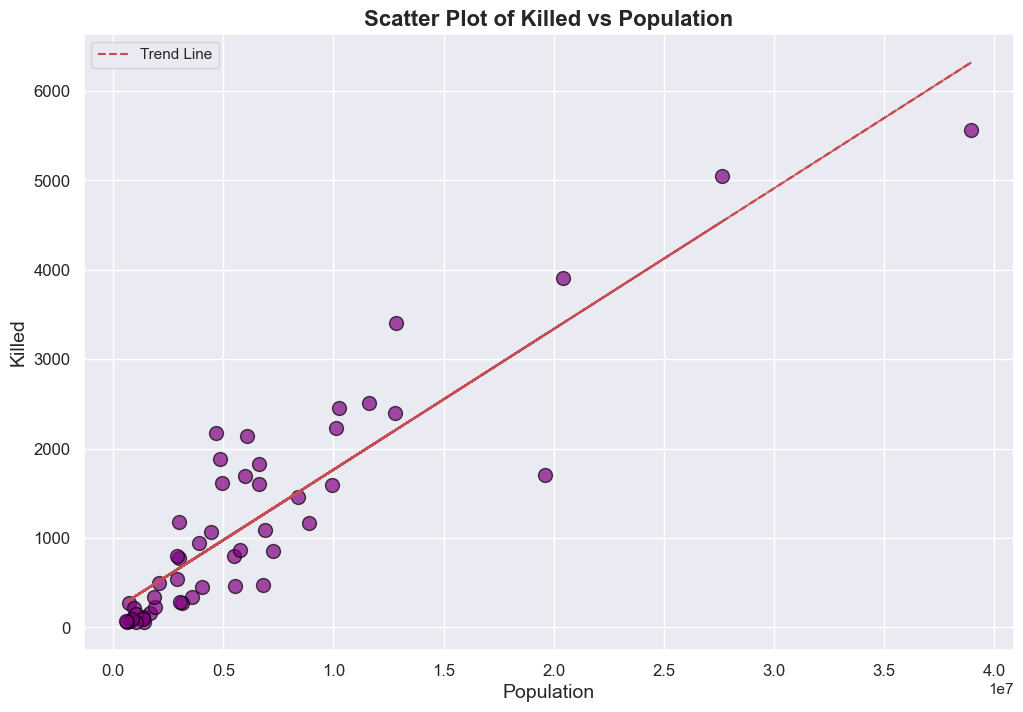

In [677]:
# Set the seaborn style
sns.set(style="darkgrid")

plt.figure(figsize=(12, 8))

# Scatter plot with more aesthetic features
scatter = plt.scatter(final_merged_df['Population'], final_merged_df['n_killed'], 
                      color='purple', alpha=0.7, edgecolor='black', s=100)

# Add a trend line (optional)
z = np.polyfit(final_merged_df['Population'], final_merged_df['n_killed'], 1)
p = np.poly1d(z)
plt.plot(final_merged_df['Population'], p(final_merged_df['Population']), "r--", label='Trend Line')

# Set the title and labels
plt.title('Scatter Plot of Killed vs Population', fontsize=16, fontweight='bold')
plt.xlabel('Population', fontsize=14)
plt.ylabel('Killed', fontsize=14)

# Customize the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

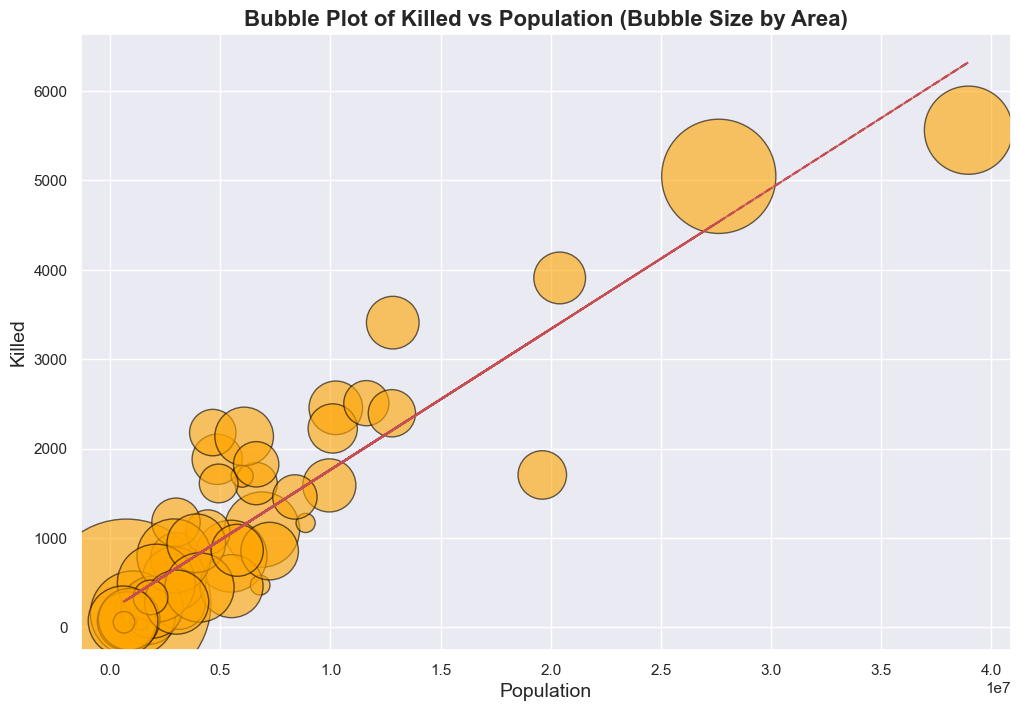

In [678]:
plt.figure(figsize=(12, 8))
bubble = plt.scatter(final_merged_df['Population'], final_merged_df['n_killed'], 
                     s=final_merged_df['Sq. Km.']/100,  # Adjust size by area
                     color='orange', alpha=0.6, edgecolor='black')

z = np.polyfit(final_merged_df['Population'], final_merged_df['n_killed'], 1)
p = np.poly1d(z)
plt.plot(final_merged_df['Population'], p(final_merged_df['Population']), "r--", label='Trend Line')

plt.title('Bubble Plot of Killed vs Population (Bubble Size by Area)', fontsize=16, fontweight='bold')
plt.xlabel('Population', fontsize=14)
plt.ylabel('Killed', fontsize=14)
plt.grid(True)
plt.show()

In [679]:
region_map = {
    'Northeast': ['connecticut', 'maine', 'massachusetts', 'new hampshire', 'new jersey',
                  'new york', 'pennsylvania', 'rhode island', 'vermont'],
    'Midwest': ['illinois', 'indiana', 'iowa', 'kansas', 'michigan', 'minnesota',
                'missouri', 'nebraska', 'north dakota', 'ohio', 'south dakota', 'wisconsin'],
    'South': ['alabama', 'arkansas', 'delaware', 'district of columbia', 'florida',
              'georgia', 'kentucky', 'louisiana', 'maryland', 'mississippi',
              'north carolina', 'oklahoma', 'south carolina', 'tennessee', 'texas',
              'virginia', 'west virginia'],
    'West': ['alaska', 'arizona', 'california', 'colorado', 'hawaii', 'idaho',
             'montana', 'nevada', 'new mexico', 'oregon', 'utah', 'washington', 'wyoming']
}


# Flatten the region map for easy access
state_to_region = {state: region for region, states in region_map.items() for state in states}

# Add a new column for the region in your DataFrame
final_merged_df['Region'] = final_merged_df['State'].map(state_to_region)

In [680]:
final_merged_df.head(55)

,State,n_killed,n_injured,injured_or_killed,Population,injured_or_killed_per_10000_per_5_years,injured_per_10000,killed_per_10000,Sq. Km.,injured_or_killed_per_100_kilometer,injured_per_100_kilometer,killed_per_100_kilometer,Region
0,alabama,1880,2998,4878,4858319,10.040510,6.170859,3.869651,131171,3.718810,2.285566,1.433244,South
1,alaska,267,325,592,737857,8.023235,4.404648,3.618587,1477953,0.040055,0.021990,0.018066,West
2,arizona,1094,1096,2190,6889326,3.178831,1.590867,1.587964,294207,0.744374,0.372527,0.371847,West
3,arkansas,773,1347,2120,2984306,7.103829,4.513612,2.590217,134771,1.573039,0.999473,0.573566,South
4,california,5562,7644,13206,38960501,3.389587,1.961987,1.427600,403466,3.273138,1.894583,1.378555,West
5,colorado,796,1133,1929,5485357,3.516635,2.065499,1.451136,268431,0.718620,0.422082,0.296538,West
6,connecticut,341,1258,1599,3583240,4.462442,3.510789,0.951653,12542,12.749163,10.030298,2.718865,Northeast
7,delaware,217,853,1070,944756,11.325676,9.028786,2.296889,5047,21.200713,16.901129,4.299584,South
9,florida,3909,7072,10981,20403663,5.381877,3.466044,1.915832,138887,7.906428,5.091909,2.814518,South
10,georgia,2456,4056,6512,10240259,6.359214,3.960837,2.398377,148959,4.371673,2.722897,1.648776,South


/var/folders/x7/rxnvmnkd6xn8sthmqxwx3w1w0000gn/T/ipykernel_54074/3669669177.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # Optional: adjust legend position


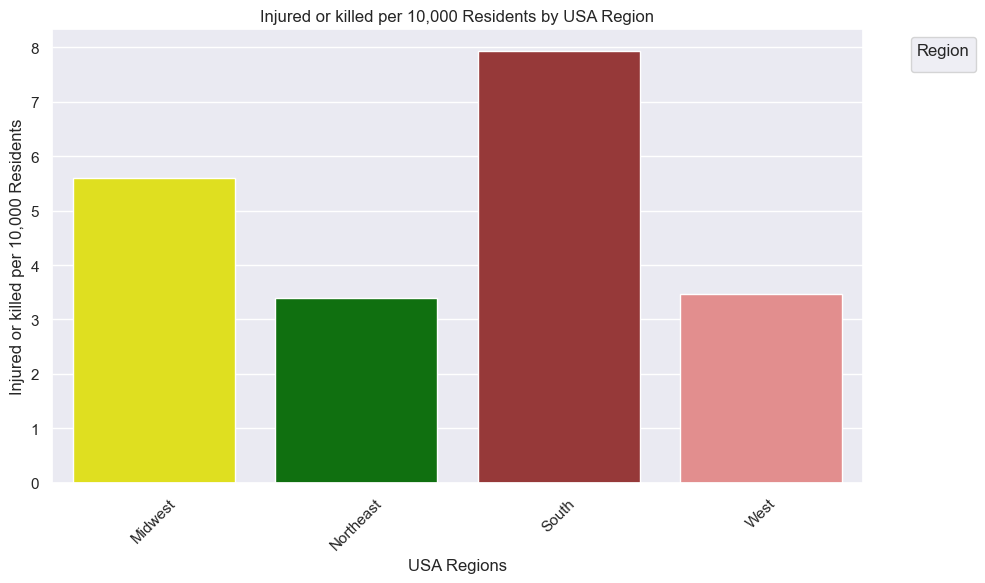

In [681]:
# Group by region and calculate the average killed per 10000
average_killed = final_merged_df.groupby('Region')['injured_or_killed_per_10000_per_5_years'].mean().reset_index()

# Sort the regions if needed (optional)
average_killed = average_killed.sort_values(by='Region')

# Define a color dictionary for each region
color_dict = {
    'Northeast': 'green',
    'Midwest': 'yellow',
    'South': 'brown',
    'West': 'lightcoral'  # light red
}

# Create a new column for colors based on the region
average_killed['color'] = average_killed['Region'].map(color_dict)

# Create the bar plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=average_killed, x='Region', y='injured_or_killed_per_10000_per_5_years', hue='Region', palette=color_dict, dodge=False)
plt.xlabel('USA Regions')
plt.ylabel('Injured or killed per 10,000 Residents')
plt.title('Injured or killed per 10,000 Residents by USA Region')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # Optional: adjust legend position
plt.tight_layout()
plt.show()


In [682]:
# Select only the desired columns
final_merged_df = final_merged_df.loc[:, ['State', 'n_killed', 'Population', 'killed_per_10000']]

# Round the 'killed_per_10000' column to two decimal points
final_merged_df['killed_per_10000'] = final_merged_df['killed_per_10000'].round(2)

final_merged_df.head()


,State,n_killed,Population,killed_per_10000
0,alabama,1880,4858319,3.87
1,alaska,267,737857,3.62
2,arizona,1094,6889326,1.59
3,arkansas,773,2984306,2.59
4,california,5562,38960501,1.43


In [683]:
final_merged_df.to_excel("data/final.xlsx", index=False)